In [1]:
import mlgrad.mlocation_scatter as mls
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])

In [2]:
df = pd.read_csv('data/animals.csv')
#df

In [3]:
X = df["body"].values.reshape((-1,1))
X = np.asarray(X, "d")
Y = df["brain"].values

X = np.log(X)
Y = np.log(Y)
print(len(Y))

28


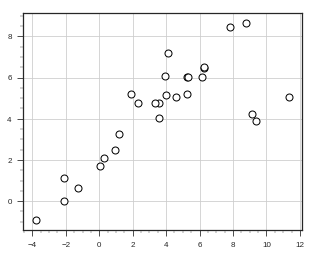

In [4]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [5]:
XY = np.c_[X, Y]

In [6]:
avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.87, func.Sqrt(0.001))))
mlse = mls.MLocationScatterEstimator(avg, n_iter=5000)
mlse.fit(XY)

In [7]:
loc, sc = mlse.loc, mlse.S
distfunc = mlse.distfunc

In [8]:
print(loc.base)
print(mlse.S.base)
print(mlse.K)


[3.14601735 4.72385455]
[[18.23490273 14.12322468]
 [14.12322468 12.5080479 ]]
5001


In [9]:
loc0 = sum([xy for xy in XY])/len(XY)

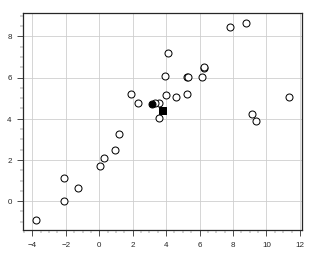

In [10]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([loc[0]], [loc[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o')
plt.scatter([loc0[0]], [loc0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s')
plt.minorticks_on()
plt.grid(1)
plt.show()

In [11]:
print(mlse.S.base)
print(np.linalg.eig(mlse.S))
print(np.linalg.eig(mlse.S0))

[[18.23490273 14.12322468]
 [14.12322468 12.5080479 ]]
(array([29.78205101,  0.96089962]), array([[ 0.77417801, -0.63296793],
       [ 0.63296793,  0.77417801]]))
(array([17.56047625,  1.70054992]), array([[ 0.87018599, -0.49272339],
       [ 0.49272339,  0.87018599]]))


In [12]:
distfunc = distance.MahalanobisDistance(np.linalg.inv(mlse.S))
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(mlse.S0))

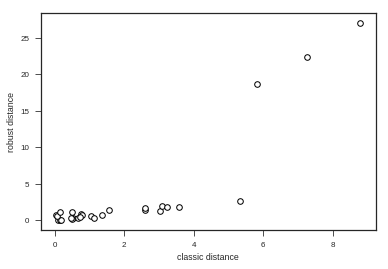

In [13]:
D0 = [distfunc0(xy, mlse.loc0) for xy in XY]
D = [mlse.distfunc(xy, mlse.loc) for xy in XY]
plt.scatter(D0, D, c='w', edgecolor='k', linewidth=1)
plt.xlabel('classic distance')
plt.ylabel('robust distance')
plt.show()

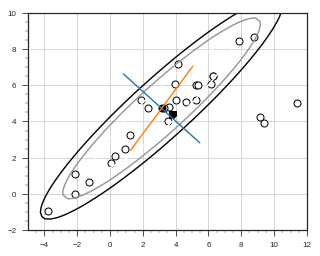

In [15]:
_, eigvecs = np.linalg.eig(mlse.S1)
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([loc[0]], [loc[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o')
plt.scatter([loc0[0]], [loc0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s')
plt.plot([loc[0]-3*eigvecs[0,0], loc[0], loc[0]+3*eigvecs[0,0]], 
         [loc[1]-3*eigvecs[0,1], loc[1], loc[1]+3*eigvecs[0,1]])
plt.plot([loc[0]-3*eigvecs[1,0], loc[0], loc[0]+3*eigvecs[1,0]], 
         [loc[1]-3*eigvecs[1,1], loc[1], loc[1]+3*eigvecs[1,1]])
xrange = np.linspace(-5., 12., 50)
yrange = np.linspace(-2., 10., 50)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[XX.ravel(), YY.ravel()]
D = np.array([mlse.distfunc(loc, xy) for xy in XY])
D = D.reshape(XX.shape)
plt.contour(XX, YY, D, levels=(1,2,3))
plt.minorticks_on()
plt.grid(1)
plt.xlim(-5, 12)
plt.ylim(-2, 12)
plt.show()